In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.decomposition import PCA
import sklearn.metrics as met
import itertools
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

### Importing the Data 

In [27]:
CCData=pd.read_csv("CC.csv")

### Data Exploration 

0    284315
1       492
Name: Class, dtype: int64

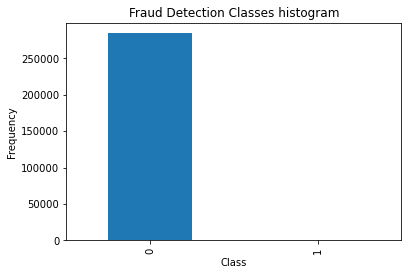

In [28]:
pd.value_counts(CCData['Class']).plot.bar()
plt.title('Fraud Detection Classes histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
CCData['Class'].value_counts()

### Scaling

In [29]:
std_scaler=StandardScaler()
CCData['SAmount']=std_scaler.fit_transform(CCData['Amount'].values.reshape(-1,1))
CCData['STime']=std_scaler.fit_transform(CCData['Time'].values.reshape(-1,1))
CCData.drop(['Time','Amount'],axis=1,inplace=True)
SCAmount= CCData['SAmount']
SCTime = CCData['STime']
CCData.drop(['SAmount', 'STime'], axis=1, inplace=True)
CCData.insert(1, 'SAmount', SCAmount)
CCData.insert(2, 'STime', SCTime)

#### Separation of input variables from target variable

In [30]:
CCFeature_names = CCData.iloc[:, 1:31].columns
targetClass = CCData.iloc[:1, 31:].columns

CCDataFeatures = CCData[CCFeature_names]
CCData_target = CCData[targetClass]

### Undersampling

In [31]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(CCData[CCData.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = CCData[CCData.Class == 1].index
not_fraud_indices = CCData[CCData.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = CCData.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:31]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Spliting the Training and Testing Datasets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(CCDataFeatures, CCData_target,train_size = 0.80, test_size = 0.20, random_state = 1)

### Building the K-Nearest Neighbor Classifier Model with the Skewed Data

In [33]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
pca= PCA()
X_train_knn = pd.DataFrame(pca.fit_transform(X_train))
knn.fit=knn.fit(X_train, y_train)
y_pred = pd.DataFrame(knn.predict(X_test))

/home/weldat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [34]:
print("Evaluation Results of Decision Tree Classifier on the Skewed Data! ")
# Accuracy
print("Accuracy : ",met.accuracy_score(y_test, y_pred))
#Precision
print('Precision : ', met.precision_score(y_test, y_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(y_test, y_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(y_test,y_pred))


#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(y_test, y_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(y_test, y_pred))

Evaluation Results of Decision Tree Classifier on the Skewed Data! 
Accuracy :  0.9994382219725431
Precision :  0.8985507246376812
F-1 Score :  0.7948717948717949
Recall/Sensitivity/ Score :  0.7126436781609196
Matthews Correlation Coefficient :  0.7999517521593619
Balanced classification Rate:  0.8562603006189213


### Building the Decision Tree Classifier Model with Balanced Data

In [35]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
pca= PCA()
X_Utrain_knn = pd.DataFrame(pca.fit_transform(X_undersampled_train))
knn.fit=knn.fit(X_undersampled_train, Y_undersampled_train)
yUnder_pred = pd.DataFrame(knn.predict(X_undersampled_test))

In [36]:
print("Evaluation Results of Decision Tree Classifier Machine Learning Model on Balanced Data! ")
# Accuracy
print("Accuracy : ",met.accuracy_score(Y_undersampled_test, yUnder_pred))
#Precision
print('Precision : ', met.precision_score(Y_undersampled_test, yUnder_pred))
#F-1 Score 
print('F-1 Score : ',met.f1_score(Y_undersampled_test, yUnder_pred))

#Recall= TP / [TP+FN] 
print('Recall/Sensitivity/ Score : ',met.recall_score(Y_undersampled_test, yUnder_pred))

#Specificity -Similar to Recall but calculates for the Negative Score
   # Specificity= TN / [TN+FP] 


#Matthews Correlation Coefficient 
print('Matthews Correlation Coefficient : ',met.matthews_corrcoef(Y_undersampled_test, yUnder_pred))

#Balanced classification Rate 
print('Balanced classification Rate: ',met.balanced_accuracy_score(Y_undersampled_test, yUnder_pred))


Evaluation Results of Decision Tree Classifier Machine Learning Model on Balanced Data! 
Accuracy :  0.9358108108108109
Precision :  0.9716312056737588
F-1 Score :  0.9351535836177474
Recall/Sensitivity/ Score :  0.9013157894736842
Matthews Correlation Coefficient :  0.8741972631450059
Balanced classification Rate:  0.9367690058479532
